In [796]:
%%html
<style>
table {float:left}
</style>

In [797]:
# my python files
import src.analytics as tics
import src.plotting_functions as pltfuncs
import src.transforms as trans
import src.hyp_test as hyp
import src.score_model as sc
import src.roc_curve as roc
import src.run_on_classifier as run



# Imports
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import kendalltau
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from basis_expansions.basis_expansions import (
    Polynomial, LinearSpline, NaturalCubicSpline)
from regression_tools.dftransformers import (
    ColumnSelector, Identity, FeatureUnion, MapFeature, Intercept)
from regression_tools.plotting_tools import (
    plot_univariate_smooth,
    bootstrap_train,
    display_coef,
    plot_bootstrap_coefs,
    plot_partial_depenence,
    plot_partial_dependences,
    predicteds_vs_actuals)
from sklearn.metrics import roc_curve, auc

%matplotlib inline

In [798]:
# On OSX requires brew install coreutils, using gshuf instead of shuf
sample_name = 'data/sample_random_subset.csv'
tics.create_random_samples('data/kddcup.data', 100000, sample_name)

df = trans.read_data(sample_name)

### Dropping Features


**Highly Correlated Features**

In [799]:
df = trans.drop_high_correlations(df)
trans.drop_zeros_columns(df)

#### Dropping irrelevant features
Considering that lasso is determining what features to keep (below), I decided to drop the suggested keepers until I get to a point where my logistic regression fails adequately.  This is an attempt to discern which features are derived

#### Then, trimming down a bit at a time

In [800]:
# # Uncomment to get a list of objects
# df_types = tics.get_dict_of_dtypes(df)
# objects = df_dtypes['object']
# objects
column_list = list(df.columns)





#--------------------------------------------#
     Running classifier on ['duration']
#--------------------------------------------#


Modified Y to balance 1s and 0s
1    20664
0    20664
Name: attack_category, dtype: int64


True Positives: 4059
True Negatives: 288
False Positives: 3919
True Negatives: 0

Accuracy: 0.5258891846116622
Classification_error: 0.47411081538833777
Recall: 1.0
Precision: 0.5087741288543495

confusion matrix
[[ 288 3919]
 [   0 4059]]




#--------------------------------------------#
     Running classifier on ['protocol_type']
#--------------------------------------------#


Modified Y to balance 1s and 0s
1    20664
0    20664
Name: attack_category, dtype: int64


True Positives: 2962
True Negatives: 4063
False Positives: 95
True Negatives: 1146

Accuracy: 0.8498669247519961
Classification_error: 0.15013307524800387
Recall: 0.7210321324245375
Precision: 0.9689237814851162

confusion matrix
[[4063   95]
 [1146 2962]]




#-----------------------------

/Users/tbot/Dropbox/0_galvanize/0_TODAY/Analyzing-Network-Traffic_kdd99/src/plotting_functions.py:123: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP + FP)




Modified Y to balance 1s and 0s
1    20664
0    20664
Name: attack_category, dtype: int64


True Positives: 4217
True Negatives: 2947
False Positives: 1099
True Negatives: 3

Accuracy: 0.866682796999758
Classification_error: 0.13331720300024197
Recall: 0.9992890995260664
Precision: 0.7932656132430399

confusion matrix
[[2947 1099]
 [   3 4217]]




#--------------------------------------------#
     Running classifier on ['wrong_fragment']
#--------------------------------------------#


Modified Y to balance 1s and 0s
1    20664
0    20664
Name: attack_category, dtype: int64


True Positives: 1
True Negatives: 4117
False Positives: 0
True Negatives: 4148

Accuracy: 0.49818533752721994
Classification_error: 0.5018146624727801
Recall: 0.00024102193299590263
Precision: 1.0

confusion matrix
[[4117    0]
 [4148    1]]




#--------------------------------------------#
     Running classifier on ['hot']
#--------------------------------------------#


Modified Y to balance 1s and 0s
1   



True Positives: 4145
True Negatives: 2019
False Positives: 2101
True Negatives: 1

Accuracy: 0.7457052988144205
Classification_error: 0.2542947011855795
Recall: 0.9997588036661843
Precision: 0.6636247198206853

confusion matrix
[[2019 2101]
 [   1 4145]]




#--------------------------------------------#
     Running classifier on ['dst_host_srv_serror_rate']
#--------------------------------------------#


Modified Y to balance 1s and 0s
1    20664
0    20664
Name: attack_category, dtype: int64


True Positives: 896
True Negatives: 4182
False Positives: 22
True Negatives: 3166

Accuracy: 0.614323735785144
Classification_error: 0.385676264214856
Recall: 0.22058099458394878
Precision: 0.9760348583877996

confusion matrix
[[4182   22]
 [3166  896]]




#--------------------------------------------#
     Running classifier on ['label']
#--------------------------------------------#


Modified Y to balance 1s and 0s
1    20664
0    20664
Name: attack_category, dtype: int64


ValueError: Found array with 0 feature(s) (shape=(33062, 0)) while a minimum of 1 is required by StandardScaler.

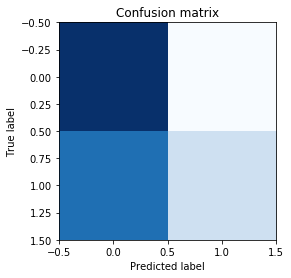

In [803]:
columns=['col', 'TN' ,'FP' ,'FN','TP','accuracy' ,'recall' ,'specificity', 'false_positive_rate', 'precision']

populate_conf_mat = {'col':[], 'TN':[], 'FP':[], 
                     'FN':[], 'TP':[], 'accuracy':[], 
                     'recall':[], 'specificity':[], 
                     'false_positive_rate':[], 'precision':[]
                    }

for col in column_list:
    keep = [col]

    # logistic regression object
    classifier = LogisticRegression(penalty='l1')

    TN, FP, FN, TP, accuracy, recall, specificity, false_positive_rate, precision = run.run_classifier(df, keep, classifier)
    
    populate_conf_mat['col'].append(col)
    populate_conf_mat['TN'].append(TN)
    populate_conf_mat['FP'].append(FP)
    populate_conf_mat['FN'].append(FN)
    populate_conf_mat['TP'].append(TP)
    populate_conf_mat['accuracy'].append(accuracy)
    populate_conf_mat['recall'].append(recall)
    populate_conf_mat['specificity'].append(specificity)
    populate_conf_mat['false_positive_rate'].append(false_positive_rate)
    populate_conf_mat['precision'].append(precision)


conf_matrix_vals = pd.DataFrame(index=index, columns=columns)

# df = trans.drop_all_except(df, keep)



In [802]:
# title = 'Correlation Matrix of data after Dropping Correlated'
# pltfuncs.corr_heat(df, title)

# df.columns
populate_conf_mat

{'FN': [],
 'FP': [],
 'TN': [],
 'TP': [],
 'accuracy': [],
 'col': [295,
  4021,
  3777,
  4145,
  10,
  2915,
  0,
  25,
  4129,
  2833,
  3,
  4121,
  0,
  34,
  13,
  0,
  4100,
  362,
  215,
  1412,
  2373,
  761,
  2096,
  4065],
 'false_positive_rate': [],
 'precision': [],
 'recall': [],
 'specificity': []}

In [741]:
# df.columns
# g = sns.pairplot(df)

### Modeling
#### First try to get a simple logistic regression model working
- steps to get there
    - transform Label into its attack_category
    - transform attack_category into only DOS (2), the rest zero, as DOS is the most prevalent type
    - balance the data set by undersampling the more represented y

In [742]:
# # read in label names csv and send it as dictionary to mapping function
# label_names = ['label', 'attack_category', 'attack_cat_num']
# labels_loc = 'data/categories.csv'
# labels_to_categories = pd.read_csv(labels_loc, header=None)
# labels_to_categories.columns = label_names
# col_name = 'label'
# new_col_name = 'attack_category'

# df = trans.rewrite_values(df, dict(zip(labels_to_categories.label, labels_to_categories.attack_cat_num)), col_name, new_col_name)
# df['attack_category'].value_counts()

2    79235
0    19900
1      827
4       36
3        2
Name: attack_category, dtype: int64

In [743]:
# # rewrite all except attack_category types 2 to zero, put to new dataframe
# df = trans.rewrite_category2_to_zeros(df)
# # df2['attack_category'].value_counts()
# df.head()

,protocol_type,label,attack_category
0,icmp,smurf.,1
1,icmp,smurf.,1
2,tcp,neptune.,1
3,icmp,smurf.,1
4,icmp,smurf.,1


In [744]:
# df = trans.split_to_5050(df)
# df['attack_category'].value_counts()


removed 58470 rows


1    20765
0    20765
Name: attack_category, dtype: int64

In [697]:
# # drop label BEFORE running get dummies on data
# drop_if_in(df, 'label')
# 'label' in df

dropped label


False

In [698]:
# # if 'protocol_type' in df:
# df = pd.get_dummies(df)
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41932 entries, 75969 to 66253
Data columns (total 4 columns):
attack_category       41932 non-null int64
protocol_type_icmp    41932 non-null uint8
protocol_type_tcp     41932 non-null uint8
protocol_type_udp     41932 non-null uint8
dtypes: int64(1), uint8(3)
memory usage: 778.0 KB


In [699]:
# # Split X and Y
# y = df['attack_category']
# X = df.copy()

# # in order to not throw errors
# if 'attack_category' in X:
#     X.drop(['attack_category'], axis=1, inplace=True)
# if 'label' in X:
#     X.drop(['label'], axis=1, inplace=True)
    


Index(['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp'], dtype='object')

### Attempting logistic regression

In [700]:
# # Split the dataset into the Training set and Test set
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#
# y_train.sum()
# len(y_train)

In [701]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

In [702]:
# from sklearn.linear_model import LogisticRegression

# # logistic regression object
# classifier = LogisticRegression(penalty='l1')

# # teach classifier the correlations betw X_train and y_train
# classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [703]:
# # Predict the Test set results
# y_pred = classifier.predict(X_test) # vector giving prediction of each of the test set observations

True Positives: 3021
True Negatives: 4044
False Positives: 108
True Negatives: 1214

Accuracy: 0.8423751043281269
Classification_error: 0.15762489567187313
Recall: 0.7133412042502951
Precision: 0.965484180249281

confusion matrix
[[4044  108]
 [1214 3021]]


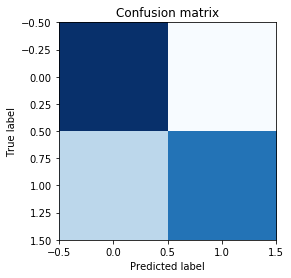

In [704]:
# pltfuncs.my_confusion_matrix(y_test, y_pred)

In [389]:
# lasso = Lasso()
# lasso.fit(X_train, y_train)

# print(lasso)
# print(lasso.coef_)
# # remove 0 coefficients 
# lasso.coef_

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
[ 0. -0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.
  0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0.  0.  0. -0.  0.  0.
  0.  0.  0. -0. -0. -0. -0.  0.  0.  0.  0. -0. -0.  0. -0. -0.  0. -0.
 -0. -0. -0. -0.]


array([ 0., -0., -0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0., -0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,
       -0., -0.,  0., -0., -0.,  0., -0., -0., -0., -0., -0.])

### Clean up below

In [ ]:
# from sklearn.datasets import make_classification
# from sklearn.linear_model import LogisticRegression
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y)


# # scaler = StandardScaler().fit(X_train)
# # X_train_1 = scaler.transform(X_train)
# # X_test_1 = scaler.transform(X_test)

# model = LogisticRegression(class_weight='balanced')
# model.fit(X_train, y_train)
# probabilities = model.predict_proba(X_test)[:, 1]

# # tpr, fpr, thresholds = roc.roc_curve(probabilities, y_test)
# tpr, fpr, thresholds = roc_curve(y_test, probabilities, pos_label=2)

# plt.plot(fpr, tpr)
# plt.xlabel("False Positive Rate (1 - Specificity)")
# plt.ylabel("True Positive Rate (Sensitivity, Recall)")
# plt.title("ROC plot of Logistic Regression Thresholds")
# plt.show()

### Attempting Lasso

In [ ]:
# scaler = StandardScaler()




scorer  = make_scorer(sc.rmsle, greater_is_better=True)

#How to manage many models
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('EN', Ridge())])))

In [ ]:
# results = []
# names = []
# for name, model in pipelines:
#     kfold = KFold(n_splits=3, random_state=21)
#     cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scorer)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
#     plt.plot(cv_results)
# #     plt.xlabel('n')
# #     plt.ylabel('rmse')
# #     plt.title('average test rmse vs sample size n');
    
#     print(msg)

## Run classifier on test data (has new features)

## make series of pairwise plots

## plug in knn